In [ ]:
#I have used zipfile to extraxt the zip file of the text archive
#keras and tensorflow is used to build a model that uses a Conv1D layer and a Bidirectional GRU layer.
#keras tokenizer has been used to tokenize texts into sequences.
#I have applied techniques such as stopwords removal. I got better results without stemming so I ommited the step.
#I trained on 80% of the data and validated on 20% of it. 
#I got a training acc of about 97% and validation acc of about 93%.
#I have also used Matplotlib to plot the accuracy and loss of the model with epochs.

In [1]:
import zipfile 

In [2]:
# extracting the zipfile
def extract(path):

  zip_ref = zipfile.ZipFile(path, 'r')

  zip_ref.extractall('/tmp')
  zip_ref.close()

In [3]:
extract('/content/drive/My Drive/bbc-full-text-document-classification.zip')

In [4]:
# concatenates all the strings in a file into one string
def txt_to_str(filename):
  news = ''
  with open(filename, errors='ignore') as f:
    for line in f:
      news = news + line
  return news


In [6]:
txt_to_str('/tmp/bbc/sport/001.txt')

'Claxton hunting first major medal\n\n\n\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In pr

In [7]:
import os

In [8]:
data = []
dirs  = os.listdir('/tmp/bbc/')

for dir in dirs:
  try:
    files = os.listdir('/tmp/bbc/' + dir + '/')
    for file in files:
      news  = txt_to_str('/tmp/bbc/' + dir + '/' + file)
      data.append([news, dir])
  except: True

In [9]:
from random import shuffle
shuffle(data) # shuffle the list of inputs

In [10]:
texts = []
labels = []
for i in range(len(data)):
  texts.append(data[i][0])
  labels.append(data[i][1])


In [11]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
# list of stopwords 

In [12]:
sentences = []

In [13]:
# Preprocessing the input texts, removal of stopwords
for text in texts:
  words  = text.lower().split()
  words = [word for word in words if word not in set(stopwords)]
  text = ' '.join(words)
  sentences.append(text)

In [14]:
sentences[0]

'queen recruit singer new tour remaining members rock band queen go tour next year former free bad company singer paul rodgers taking freddie mercury\'s place. guitarist brian may said expects road rodgers drummer roger taylor april. may said: "suddenly queen phoenix rising ashes will take precedence over... lives." queen played many different singers since mercury\'s death 1991 reportedly not toured. may performed rodgers concert celebrate 50th anniversary fender stratocaster guitar london september. "we amazed chemistry going [free hit] right now, suddenly seems blindingly obvious \'something happening here,\'" may wrote website. teamed concert mark induction uk music hall fame, joined taylor. "the show went incredibly well point view, got many rave reactions there, decided almost look tour together," may wrote. queen went number one 2000 version will rock sung boy band 5ive also played robbie williams, will young bob geldof. queen bassist john deacon currently retired stage. rodgers

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
#hyperparameters of the model
vocab_size = 15000
embedding_dim = 64
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8
num_epochs = 15

In [24]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [25]:
#using keras tokenizer to tokenize the input texts
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) #padding sequences 

In [26]:
print(len(word_index))

29080


In [27]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [28]:
# tokenizing the labels into integer values
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) -1
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) -1 

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 5, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           960000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           20544     
_________________________________________________________________
dropout_5 (Dropout)          (None, 496, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49920     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)               

In [53]:
history = model.fit(train_padded, training_label_seq, epochs= num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/15
56/56 - 11s - loss: 1.6063 - accuracy: 0.2270 - val_loss: 1.6042 - val_accuracy: 0.2112
Epoch 2/15
56/56 - 11s - loss: 1.5988 - accuracy: 0.2472 - val_loss: 1.5953 - val_accuracy: 0.2989
Epoch 3/15
56/56 - 11s - loss: 1.5000 - accuracy: 0.3315 - val_loss: 1.3485 - val_accuracy: 0.4494
Epoch 4/15
56/56 - 11s - loss: 1.1689 - accuracy: 0.4596 - val_loss: 0.9678 - val_accuracy: 0.5910
Epoch 5/15
56/56 - 11s - loss: 0.8135 - accuracy: 0.6421 - val_loss: 0.5815 - val_accuracy: 0.7775
Epoch 6/15
56/56 - 11s - loss: 0.4714 - accuracy: 0.8146 - val_loss: 0.4210 - val_accuracy: 0.8607
Epoch 7/15
56/56 - 11s - loss: 0.3204 - accuracy: 0.8753 - val_loss: 0.3337 - val_accuracy: 0.9011
Epoch 8/15
56/56 - 11s - loss: 0.2129 - accuracy: 0.9315 - val_loss: 0.4046 - val_accuracy: 0.8742
Epoch 9/15
56/56 - 11s - loss: 0.1525 - accuracy: 0.9534 - val_loss: 0.3086 - val_accuracy: 0.9124
Epoch 10/15
56/56 - 11s - loss: 0.1035 - accuracy: 0.9646 - val_loss: 0.3531 - val_accuracy: 0.9146
Epoch 11/

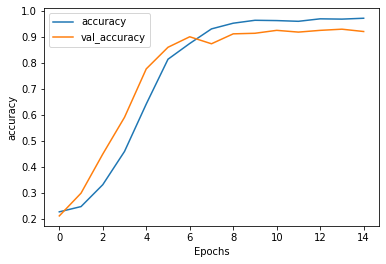

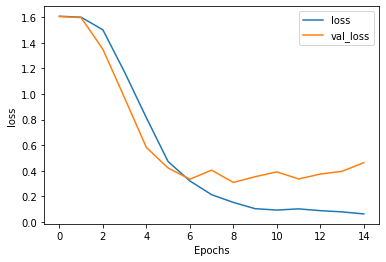

In [54]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [55]:
label_word_index  = label_tokenizer.word_index
reverse_label_index  = dict([(x-1,y) for (y,x) in label_word_index.items() ]) #for inferencing our outputs

In [56]:
print(reverse_label_index)

{0: 'sport', 1: 'business', 2: 'politics', 3: 'tech', 4: 'entertainment'}


In [63]:
pred_words  = txt_to_str('/content/drive/My Drive/classify_text.txt').lower().split()
words = [word for word in pred_words if word not in set(stopwords)]
pred_text = ' '.join(words)

In [64]:
seq = tokenizer.texts_to_sequences([pred_text])
#as the text in much longer than our training examples i am manually setting truncating to pre to pass the most relevant info.
inputs = pad_sequences(seq, maxlen = max_length, padding = padding_type, truncating= 'pre')

In [65]:
out = np.argmax(model.predict(inputs))
print('The model predicts the given article is related to ' + reverse_label_index[out] + '.')

The model predicts the given article is related to business.
